In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import svm

#from sklearn import metrics


In [25]:
#Loading data set
data = pd.read_csv("SMS_Final_dataset.csv")
print data

#Data Exploration

print(data.groupby('Type').mean())

      Unnamed: 0  Type                                            Message  \
0              0     0  @@.comGo until jurong point  crazy.. Available...   
1              1     0                      Ok lar... Joking wif u oni...   
2              2     1  Free entry in 2 a wkly comp to win FA Cup fina...   
3              3     0  U dun say so early hor... U c already then say...   
4              4     0  Nah I don't think he goes to usf  he lives aro...   
5              5     1  FreeMsg Hey there darling it's been 3 week's n...   
6              6     0  Even my brother is not like to speak with me. ...   
7              7     0  As per your request 'Melle Melle (Oru Minnamin...   
8              8     1  WINNER!! As a valued network customer you have...   
9              9     1  Had your mobile 11 months or more? U R entitle...   
10            10     0  I'm gonna be home soon and i don't want to tal...   
11            11     1  SIX chances to win CASH! From 100 to 20 000 po...   

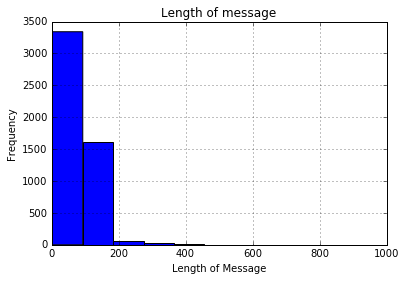

In [26]:
#Histogram presentation of length distribution
%matplotlib inline
data.Length.hist()
plt.title('Length of message')
plt.xlabel('Length of Message')
plt.ylabel('Frequency')

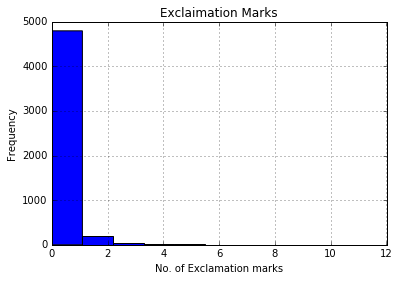

In [28]:
#Histogram presentation of exclamation marks in messages
%matplotlib inline
data.Exclaim.hist()
plt.title('Exclaimation Marks')
plt.xlabel('No. of Exclamation marks')
plt.ylabel('Frequency')

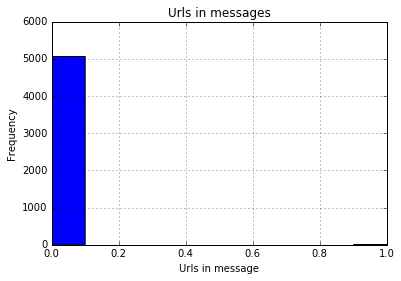

In [29]:
#Histogram presentation of urls distribution
%matplotlib inline
data.Link.hist()
plt.title('Urls in messages')
plt.xlabel('Urls in message')
plt.ylabel('Frequency')

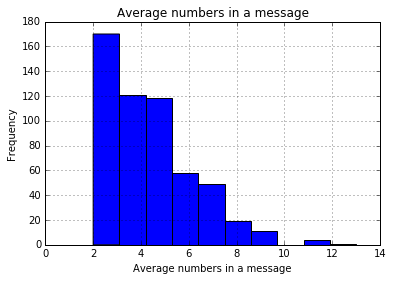

In [30]:
#Histogram presentation of Average numbers per message
%matplotlib inline
data.Average_Numbers.hist()
plt.title('Average numbers in a message')
plt.xlabel('Average numbers in a message')
plt.ylabel('Frequency')

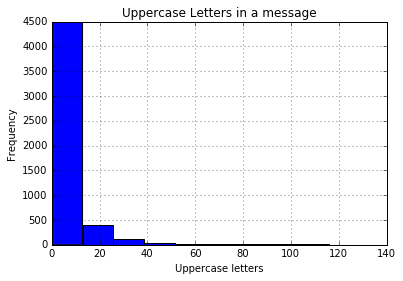

In [31]:
#Histogram presentation of uppercase letters per message
%matplotlib inline
data.Uppercase_letters.hist()
plt.title('Uppercase Letters in a message')
plt.xlabel('Uppercase letters')
plt.ylabel('Frequency')

In [32]:
#prepare
y, X = dmatrices('Type ~ Length + Exclaim + Link + Average_Numbers + Uppercase_letters',data, return_type="dataframe")
print X.columns
print X
print y

Index([u'Intercept', u'Length', u'Exclaim', u'Link', u'Average_Numbers',
       u'Uppercase_letters'],
      dtype='object')
      Intercept  Length  Exclaim  Link  Average_Numbers  Uppercase_letters
2           1.0   155.0      0.0   0.0              4.0               10.0
8           1.0   158.0      3.0   0.0              4.0               12.0
9           1.0   154.0      1.0   0.0              6.0               14.0
11          1.0   136.0      1.0   0.0              3.0               17.0
12          1.0   156.0      2.0   0.0              3.0               40.0
19          1.0   156.0      0.0   0.0              4.0               32.0
42          1.0   172.0      0.0   0.0             11.0                7.0
56          1.0   161.0      4.0   0.0              6.0               12.0
65          1.0   153.0      0.0   0.0              7.0                6.0
67          1.0   161.0      0.0   0.0              3.0               24.0
93          1.0   139.0      1.0   0.0            

In [33]:
#Flatten y into a 1-D array
y = np.ravel(y)
#print y


In [34]:
#Instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(fit_intercept = False)
model = model.fit(X, y)

#Check the accuracy on the training set
model.score(X, y)

0.96551724137931039

In [35]:
#Examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[-2.79594523187]
1,Length,[0.00959848806869]
2,Exclaim,[0.258010197391]
3,Link,[0.31545699325]
4,Average_Numbers,[0.811520440996]
5,Uppercase_letters,[0.156690936254]


In [36]:
#Predicting probability of any mesage to be a spam/ham.
model.predict_proba(np.array([1,51, 7, 1, 3,2]))

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.0715547,  0.9284453]])

In [37]:
#Applying statesmodel to find logistic regression

logit = sm.Logit(y,X).fit()
print(logit.summary())
print(model.score(X, y))


         Current function value: 0.070980
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  551
Model:                          Logit   Df Residuals:                      545
Method:                           MLE   Df Model:                            5
Date:                Mon, 19 Sep 2016   Pseudo R-squ.:                  0.5616
Time:                        15:57:07   Log-Likelihood:                -39.110
converged:                      False   LL-Null:                       -89.206
                                        LLR p-value:                 4.814e-20
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -7.4420      1.609     -4.627      0.000       -10.595    -4.289
Length                0.0222      0.008     

C:\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
